# Radiative transfer (a daily life application)! 


In [1]:
import astropy 
from astropy import units as u 
import pylab as pl 
import numpy as np 
from astropy import constants

The absorption coefficient of 1 cm of a beer with "average spectral characteristics"  at wavelength $ \lambda $  is well described by https://en.wikipedia.org/wiki/Standard_Reference_Method 


$$
\alpha_{\lambda}  =  \frac{SRM}{12.7} \left( A e^{- \frac{\lambda -\lambda_0}{a} }   
+ Be ^{- \frac{\lambda -\lambda_0}{b} } \right)  cm^{-1}
$$


We consider a standard pint  of beer to estimate the absorption! 

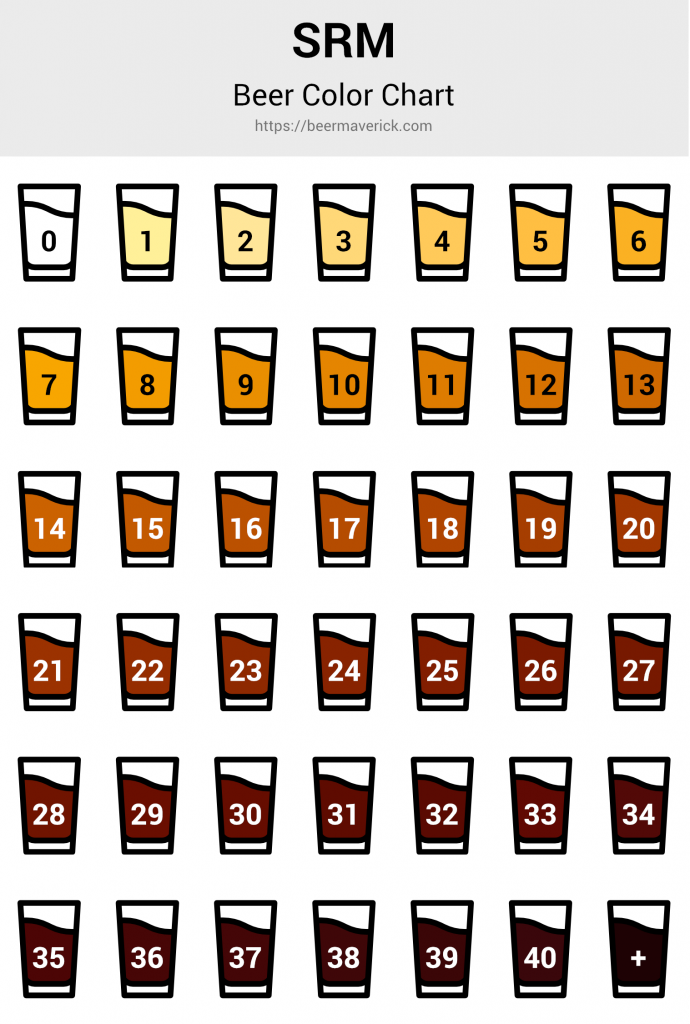

### Radiative Transfer Eq.

Once we have $\alpha_{\nu}$ we are able to solve the RTE. We simply assume absorption-only, 

$$ 
I_{\nu}(s_{2}) \approx I_{\nu} (s_{1} ) e ^{- \alpha_{\nu} *s_{glass} } 
$$ 

- we do not consider scattering effects
- no interaction with glass 


In [2]:
lambda0= 430 *u.nm
A = 0.018747 
B = 0.98226
a = 13.374  *u.nm 
b = 80.514 *u.nm 



alpha_lambda = lambda l ,SRM :  ( SRM/12.7 /u.cm *( A * np.exp(- (l -lambda0)/a ) + B* np.exp(- (l -lambda0)/b ) ))

s_glass = 10 *u.cm 
Inu =lambda alpha : np.exp(-alpha *s_glass )



In [3]:
lambdas= np.linspace(400, 800, 128)*u.nm 
colors = pl.cm.jet(np.linspace(0,1.5,lambdas.size) )

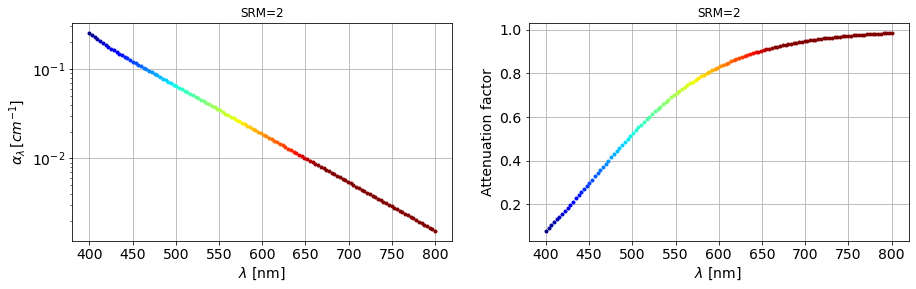

In [4]:
pl.figure(figsize=(15,4))
pl.subplot(121)
for lamb,c in zip(lambdas, colors) :
    pl.plot(lamb,   (alpha_lambda(lamb, SRM= 2 )),color=c ,marker='.' ) 
pl.xlabel(r'$\lambda $ [nm] ',fontsize=14)
pl.ylabel(r'$\alpha_{\lambda} \, [cm^{-1} ] $',fontsize=14)
pl.grid(True )
pl.semilogy()
pl.xticks(fontsize=14 )
pl.yticks(fontsize=14 )
pl.title('SRM=2')
pl.subplot(122)
for lamb,c in zip(lambdas, colors) :
    pl.plot(lamb, Inu (alpha_lambda(lamb, SRM= 2 )),color=c ,marker='.' ) 
pl.xlabel(r'$\lambda $ [nm] ',fontsize=14)
pl.ylabel(r'Attenuation factor',fontsize=14)

pl.xticks(fontsize=14 )
pl.yticks(fontsize=14 )
pl.title('SRM=2')
pl.grid(True )

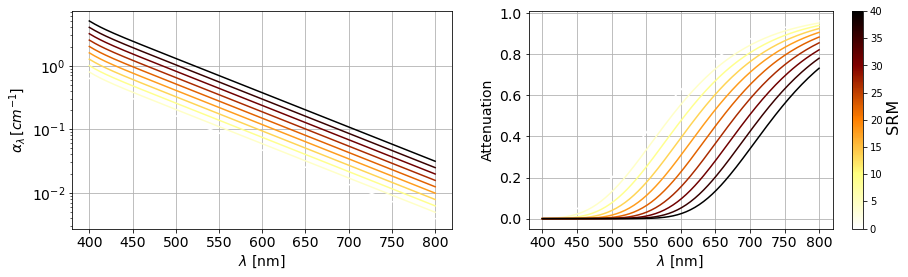

In [5]:
pl.figure(figsize=(15,4))

srms = np.logspace(pl.log10(5) ,pl.log10(40) ,10)
bcolors = pl.cm.afmhot_r(pl.linspace(0,1, srms.size )) 
pl.subplot(121 )

for lamb,c in zip(srms, bcolors) :

    pl.plot(lambdas,  alpha_lambda(lambdas, SRM= lamb  )   ,color=c ) 
pl.xlabel(r'$\lambda $ [nm] ',fontsize=14)
pl.ylabel(r'$\alpha_{\lambda} \, [cm^{-1} ] $',fontsize=14)

pl.semilogy()
pl.xticks(fontsize=14 )
pl.yticks(fontsize=14 )
pl.grid(True )
pl.subplot(122 )

for lamb,c in zip(srms, bcolors) :

    pl.plot(lambdas,   Inu(alpha_lambda(lambdas, SRM= lamb  ))   ,color=c ) 
pl.xlabel(r'$\lambda $ [nm] ',fontsize=14)
pl.ylabel(r'Attenuation',fontsize=14)

#pl.semilogy()
sm = pl.cm.ScalarMappable(cmap=pl.cm.afmhot_r ,norm=pl.Normalize (vmin=0,vmax=srms.max()  ))
cb =pl.colorbar(sm)
cb.set_label(r' SRM' ,rotation='90', fontsize=16 )
pl.xticks(fontsize=14 )
pl.yticks(fontsize=14 )
pl.grid(True )

## Optical Depth 

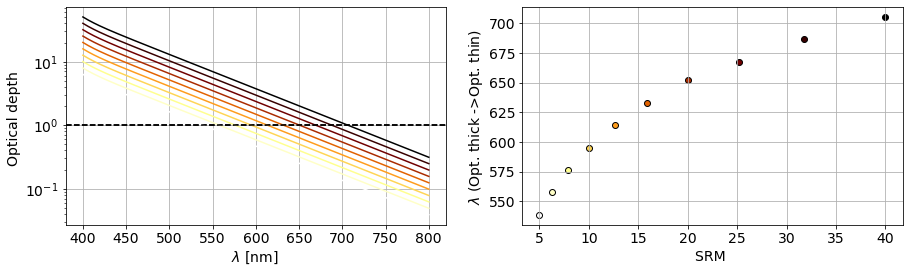

In [11]:
pl.figure(figsize=(15,4))

pl.subplot(121 )
trans=[] 
pl.axhline(1, linestyle='--' , color='k', )

for lamb,c in zip(srms, bcolors) :
    tau = alpha_lambda(lambdas, SRM= lamb  )*s_glass
    pl.plot((lambdas),   tau    ,color=c ) 
    trans.append(lambdas[np.argmin(np.fabs(tau- 1 )) ] )
    
pl.xlabel(r'$\lambda $ [nm] ',fontsize=14)
pl.ylabel(r'Optical depth ',fontsize=14)
pl.axhline(1, linestyle='--' , color='k', )
pl.semilogy()
pl.xticks(fontsize=14 )
pl.yticks(fontsize=14 )
pl.grid(True )
pl.subplot(122 )

for lamb, sr,c in zip(trans, srms, bcolors) :
    pl.scatter(sr,(lamb)    ,color=c, edgecolors='k' ) 
pl.ylabel(r'$\lambda $ (Opt. thick ->Opt. thin) ',fontsize=14)
pl.xlabel(r'SRM ',fontsize=14)
pl.xticks(fontsize=14 )
pl.yticks(fontsize=14 )
pl.grid(True )